<a href="https://colab.research.google.com/github/bingsen-wang/EE-Fundamentals/blob/main/Hooke'sLaw_multiDampedOsicillators_positiveInitialCondition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1><b>Hooke's Law: Mass-Spring-Damper</h1></b>

Dr. Bingsen Wang

12/14/2025
</center>

#Python Code

0
0
100
200
300
400
0


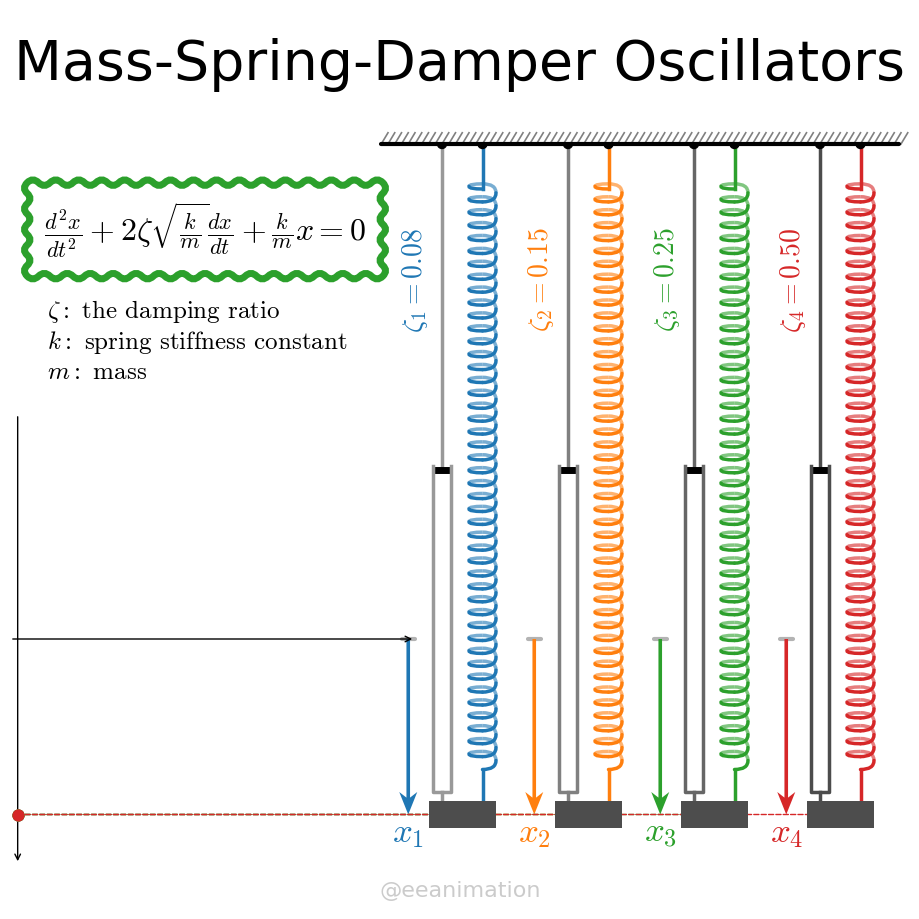

In [2]:
from matplotlib import pyplot,animation,cm,patches,transforms
import numpy as np
from scipy.integrate import odeint
from matplotlib.path import Path
pyplot.rcParams.update({"font.family":"sans-serif", "mathtext.fontset":"cm"})

Nf=480 #number of animation frames
m=.1; g=9.81 #mass and gravity acceleration
ks=g #spring stiffness constant
t=np.linspace(0,4*2*np.pi*np.sqrt(m/ks),Nf) #time series
zeta = [.08,.15,.25,.5] #damping ratios
Ns = len(zeta);Nc = 45 # number of springs, coils/spring
wc = .06 #coil width
kscl=.4; kscw=.5 #small coil length and width ratios
xys=[(-.45+.28*k,0)for k in range(Ns)] #spring anchor points at the top
wmass = .15; hmass = .06 #width and height of the mass block
wdamper=.04 #width of the damper
ymass=-1.1 #y position of the mass at equilibrium point

sys=lambda x,t,k,m,zeta: [x[1],-k/m*x[0]-2*zeta*np.sqrt(k/m)*x[1]] #system
x0=[.39,0] #initial condition [x0, v0]
sols = [odeint(sys,x0,t,args=(ks,m,z)) for z in zeta] #ode solver
xs = [sol[:,0] for sol in sols] #solutions

cl = list(cm.tab10.colors) #colors of lines
lw = 2.5 #line width
fig = pyplot.figure(figsize=([9,9]))
ax = fig.add_axes([0,0,1,1],xlim=[-1.2,1.2],ylim=[-1.2,1.25]);ax.axis('off')
ax1 = fig.add_axes([.4,0,.6,.9],xlim=[-.7,.5],ylim=[-1.7,.1],fc='none');ax1.axis('off')
ax2 = fig.add_axes([0,.05,.45,.5],xlim=[-.05,max(t)+.05],ylim=[.5,-.5],fc='none');ax2.axis('off')
ax.text(0,1.1,"Mass-Spring-Damper Oscillators",size=40,ha='center',va='center')
ax.text(-.68,.65,r'$\frac{d^2x}{dt^2}+2\zeta\sqrt{\frac{k}{m}}\frac{dx}{dt}+\frac{k}{m}x=0$',
        size=23,bbox=dict(fc='none', ec=cl[2],boxstyle='roundtooth',lw=5,pad=.7),ha='center',va='center')
ax.text(-1.1,.35,r'$\zeta:\text{ the damping ratio}$'+'\n'+
        r'$k:\text{ spring stiffness constant}$'+'\n'+r'$m:\text{ mass}$',size=18,ha='left',va='center')
ax2.annotate('',xy=(ax2.get_xlim()[1],0),xytext=(ax2.get_xlim()[0],0),arrowprops=dict(arrowstyle='->',lw=1))
ax2.annotate('',xy=(0,ax2.get_ylim()[0]),xytext=(0,ax2.get_ylim()[1]),arrowprops=dict(arrowstyle='->',lw=1))
ax1.plot([-.675,.475],[0]*2,lw=3,c='k',solid_capstyle='round',zorder=3)
[ax1.plot([-.675+k*.015,-.675+(k+1)*.015],[0,.025], c='.5',lw=1.2,zorder=-2)for k in range(78)]
codes = [Path.MOVETO]+[Path.CURVE3]*2
springs = [patches.PathPatch(Path([(0,0)]*3, codes), fc='none',ec=cl[m],lw=lw,alpha=[1,.6][k//(Nc*2)],
                zorder=[3,-3][k//(Nc*2)],capstyle=['round','butt'][k//(Nc*2)])for m in range(Ns) for k in range(Nc*4)]
[ax1.add_patch(coil) for coil in springs]

lines,txts,masses,vec_xs,cons=[[] for _ in range(5)]
for m in range(Ns):
  masses += [patches.Rectangle((0,0),width=wmass,height=hmass,ec='none',fc='.3',zorder=3)]
  vec_xs += [patches.FancyArrow(xys[m][0]-wmass*1.1,ymass,0,0,width=.008,length_includes_head=True,
                            head_width=.04,head_length=.05,color=cl[m],lw=0,overhang=.25)]
  cons += [patches.ConnectionPatch(xyA=(0,0), xyB=(0,0), coordsA="data", coordsB="data", axesA=ax2, axesB=ax1,
                          color=cl[m], lw=1, ls="--")] #dotted connection lines
  [ax1.add_patch(p[-1]) for p in [masses,vec_xs,cons]]
  ax1.add_patch(patches.Wedge(xys[m],r=.01,theta1=180,theta2=0,color='k',zorder=3))
  ax1.add_patch(patches.Wedge((xys[m][0]-wmass*.6,xys[m][1]),r=.01,theta1=180,theta2=0,color='k',zorder=3))
  ax1.plot([xys[m][0]-.6*wmass]*2,[xys[m][1],xys[m][1]-.725],lw=lw,c=str(.6-.1*m),zorder=-2) #damper rod
  ax1.plot([xys[m][0]-.6*wmass-.2*wdamper,xys[m][0]-.6*wmass+.2*wdamper],[xys[m][1]-.725]*2,lw=lw*2,c='k',zorder=-2) #damper piston
  ax1.plot([xys[m][0]-1.2*wmass,xys[m][0]-wmass],[xys[m][1]+ymass]*2,lw=3,c='.7',solid_capstyle='round',zorder=-2) #x references
  ax1.text(xys[m][0]-wmass,-.3,rf'$\zeta_{m+1}={zeta[m]:.2f}$',size=20,c=cl[m],ha='center',va='center',rotation=90)
  lines += [ax1.plot([],[],lw=lw,c=springs[m*Nc*4].get_edgecolor(),zorder=2)[0] for _ in range(2)] #sping terminals
  lines += [ax2.plot([],[],lw=lw,c=cl[m],solid_capstyle='round')[0]] #dynamic plots
  lines += [ax2.scatter(0,0,s=60,color=cl[m],marker='o',zorder=3)] #dots at end of lines
  lines += [ax1.plot([0,0]+[wdamper]*2,[.725,0,0,.725],lw=lw,color=str(.6-.1*m),zorder=2)[0]] #damper tube
  lines += [ax1.plot([],[],lw=lw,color=str(.6-.1*m),zorder=2)[0]] #damper-mass line
  txts += [ax1.text(0,0,rf'$x_{m+1}$',size=25,color=cl[m], ha='center')]

def animate(i):
  if i%100==0: print(i) #for monitoring
  for m in range(Ns):
    mass=masses[m]; vec_x=vec_xs[m]; x=xs[m]; con=cons[m]; xy0=xys[m]
    coils=springs[m*Nc*4:(m+1)*Nc*4]
    lsp=-ymass-.2+x[i]; lc=lsp/Nc #spring and coil lengths
    xp = int(np.heaviside(x[i],0)) #polarity of x
    con.xy1=(t[i],x[i]); con.xy2=(xy0[0],xy0[1]-lsp-.2) #set the connecing dotted line
    lines[m*len(lines)//Ns].set_data([xy0[0]]*2,[xy0[1],xy0[1]-.1])
    lines[m*len(lines)//Ns+1].set_data([xy0[0]]*2,[xy0[1]-.1-lsp,xy0[1]-.2-lsp])
    lines[m*len(lines)//Ns+2].set_data(t[:i+1],x[:i+1])
    lines[m*len(lines)//Ns+3].set_offsets((t[i],x[i]))
    lines[m*len(lines)//Ns+4].set_transform(transforms.Affine2D().translate(xy0[0]-wmass*.6-wdamper/2,xy0[1]-lsp-.2+.05)+ax1.transData)
    lines[m*len(lines)//Ns+5].set_data([xy0[0]-.6*wmass]*2,[xy0[1]-lsp-.15,xy0[1]-lsp-.2])
    txts[m].set_position((xy0[0]-wmass*1.1,xy0[1]+ymass-x[i]))
    txts[m].set_verticalalignment(['bottom','top'][xp])
    vec_x.set_data(dy=-x[i])
    mass.set_xy((xy0[0]-wmass*.8,xy0[1]-lsp-.2-hmass/2))
    for k in range(Nc):
      tr = transforms.Affine2D().translate(xy0[0]-wc/2,xy0[1]-.1-lc*k+lc*kscl/2)+ax1.transData
      coils[k].set_path(Path([(0,0),(0,-kscl/2*(lsp)/Nc),(wc*kscw,-kscl/2*lc)], codes)) #small coil front half
      coils[k+Nc].set_path(Path([(wc*kscw,-(1+kscl/2)*lc),(wc,-(1+kscl/2)*lc),(wc,-lc/2)], codes)) #large coil front half
      coils[k+2*Nc].set_path(Path([(0,0),(0, kscl/2*lc),(wc*kscw, kscl/2*lc)], codes)) #small coil rear half
      coils[k+3*Nc].set_path(Path([(wc*kscw, kscl/2*lc),(wc, kscl/2*lc),(wc,-.5*lc)], codes)) #large coil rear half
      [coils[k+i*Nc].set_transform(tr)for i in range(4)]
  return

ax.text(np.average(ax.get_xlim()),ax.get_ylim()[0]*.99+ax.get_ylim()[1]*.01,r'@eeanimation',size=16,c='.2',alpha=.25,ha='center',va='bottom')
anim = animation.FuncAnimation(fig, animate, frames=Nf, interval=20)
anim.save("multiDampedOscillators_posInit.mp4",writer=animation.FFMpegWriter(fps=60),dpi=200)